In [1]:
# EDA
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pingouin import ttest


# ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, log_loss, confusion_matrix, ConfusionMatrixDisplay

# Otimização de Hiperparâmetros
import optuna

c:\Users\Luiza\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Luiza\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_frutas = pd.read_csv('datasets/fruit.csv')

In [3]:
df_frutas.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [4]:
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


## EDA

In [5]:
# Distribuição da variavel target
px.bar(df_frutas.value_counts('Quality') / len(df_frutas) * 100)

In [6]:
# Transformar a variavel target em númerica 
df_frutas['Quality'] = (df_frutas['Quality'] == 'good').astype(int)

In [7]:
df_frutas.drop(columns=['A_id'], axis=1, inplace=True)

In [8]:
# Boxplot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality')

c:\Users\Luiza\anaconda3\lib\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [9]:
# Boxplot Quality x Sweetness
px.box(df_frutas, x='Quality', y='Sweetness', color='Quality')

c:\Users\Luiza\anaconda3\lib\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [10]:
# Teste T-Student
# Um teste estatístico que compara a média de duas de 2 grupos
# h0 - Não há diferença significativa entre as médias
# h1 - Há diferença significativa entre as médias

grupo_good_weight = df_frutas[df_frutas['Quality'] == 1]['Weight']
grupo_bad_weight = df_frutas[df_frutas['Quality'] == 0]['Weight']
ttest(x=grupo_good_weight, y=grupo_bad_weight, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.089906,3599.742464,two-sided,0.928367,"[-0.09, 0.1]",0.002841,0.036,0.050925


Não há diferença significativa entre as médias

In [11]:
grupo_good_sweetness = df_frutas[df_frutas['Quality'] == 1]['Sweetness']
grupo_bad_sweetness= df_frutas[df_frutas['Quality'] == 0]['Sweetness']
ttest(x=grupo_good_sweetness, y=grupo_bad_sweetness, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,16.396437,3995.125489,two-sided,1.590329e-58,"[0.86, 1.09]",0.51847,7.576e+54,1.0


há diferença significativa entre as médias

In [12]:
grupo_good_size = df_frutas[df_frutas['Quality'] == 1]['Size']
grupo_bad_size= df_frutas[df_frutas['Quality'] == 0]['Size']
ttest(x=grupo_good_size, y=grupo_bad_size, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.912978,3951.450727,two-sided,2.602204e-55,"[0.82, 1.06]",0.5031,5.053e+51,1.0


há diferença significativa entre as médias

In [13]:
# Corr Matrix
corr_matrix = df_frutas.corr()
corr_matrix

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


In [14]:
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr_matrix.columns,    
        y = corr_matrix.index,
        z = np.array(corr_matrix),
        text = corr_matrix.values,
        texttemplate='%{text:.2f}',
        colorscale=px.colors.diverging.RdBu,
        zmin=-1,
        zmax=1
        )
)
fig.show()

## Treinamento do Modelo Baseline

In [15]:
X = df_frutas.drop(columns=['Quality'], axis=1)
y = df_frutas['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [16]:
# liblinear - melhor pra datasets pequenos e otimização de hiperparâmetros
model_lr = LogisticRegression(solver='liblinear')

In [17]:
model_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
y_pred = model_lr.predict(X_test)

In [19]:
# Decision Function retorna o valor calculado (score) de cada instancia 
y_decision = model_lr.decision_function(X_test)

In [20]:
y_decision

array([-0.62262518,  0.03737776,  0.24573024, ...,  0.2610187 ,
        0.4326487 , -2.21871192])

In [21]:
# Probabilidade de cada instância pertencer a cada classe
y_prob = model_lr.predict_proba(X_test)

In [22]:
y_prob

array([[0.65081537, 0.34918463],
       [0.49065665, 0.50934335],
       [0.43887471, 0.56112529],
       ...,
       [0.43511331, 0.56488669],
       [0.39349402, 0.60650598],
       [0.90191731, 0.09808269]])

In [23]:
# Retornar os valores da curva ROC - TPR (True Positive Rate) e FPR (False Positive Rate), Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_decision)

In [24]:
# Calcular AUC (Area Under the Curve), com base nos valores da curva
roc_auc = auc(fpr, tpr)
roc_auc

0.8414568425263345

In [25]:
# Plotar a curva ROC com valor de AUC
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels=dict(x='FPR', y='TPR'),
    width=700, height=500
)

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [26]:
# Apresentar a importância das features
importance = np.abs(model_lr.coef_)

# Exibir a importância das features
print('Importância das Features')
for i, feature in enumerate(model_lr.feature_names_in_):
    print(f'{feature}: {importance[0][i]}')

Importância das Features
Size: 0.6049754259658942
Weight: 0.2501788945264851
Sweetness: 0.5488782226573186
Crunchiness: 0.02364668865638763
Juiciness: 0.43548115812394667
Ripeness: 0.12462577365881085
Acidity: 0.27733170657624956


In [27]:
# F1 Score é uma média harmônica entre Precision e Recall
f1_score_baseline = f1_score(y_test, y_pred)
f1_score_baseline

0.7787903893951947

In [28]:
# Apresentar o BCE (Binary Cross Entropy) - Log Loss
log_loss(y_test, y_prob)

0.4959549266183925

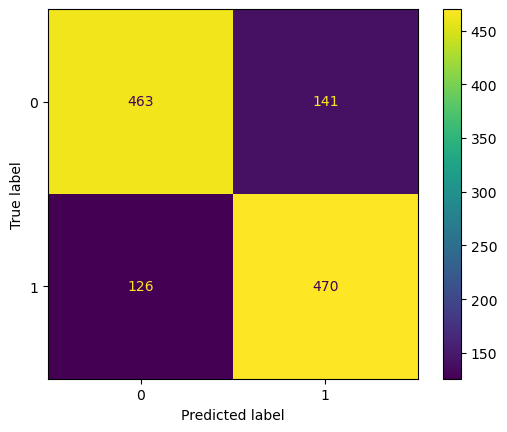

In [29]:
confusion_matrix_modelo = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix_modelo)
disp.plot()

## Otimização de Hiperparâmetros

In [30]:
# Regularização controla a complexidade do modelo, reduzindo o overfitting
# L1 (Ridge) é útil para fins de feature selection e para modelos Esparsos. Soma dos valores absolutos dos coeficientes 
# L2 (Lasso) é útil para evitar overfitting, principalmente quando há multicolinearidade. Soma dos quadrados dos coeficientes

# Hiperparâmetro C
# Valores maiores que C, regularização mais fraca
# Valores menores que C, regularização mais forte

def lr_optuna(trial):

    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    c_values = trial.suggest_categorical('c', [100, 10, 1.0, 0.1, 0.01])

    # Treinar o modelo
    model_lr_optuna = LogisticRegression(solver='liblinear', penalty=penalty, C=c_values)
    model_lr_optuna.fit(X_train, y_train)

    # Retornar a Decision Fucntion
    y_decision_optuna = model_lr_optuna.decision_function(X_test)

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_decision_optuna)

    # Calcular AUC
    roc_auc_optuna = auc(fpr, tpr)

    # Retornar 
    y_pred_optuna = model_lr_optuna.predict(X_test)

    # F1 Score optuna
    f1_score_optuna = f1_score(y_test, y_pred_optuna, average='macro')

    # Calcular BCE
    log_loss_optuna = log_loss(y_test,y_pred_optuna)

    return roc_auc_optuna, f1_score_optuna, log_loss_optuna

In [37]:
search_space = {'penalty': ['l1', 'l2'], 'c': [100, 10, 1.0, 0.1, 0.01]}
sampler = optuna.samplers.GridSampler(search_space=search_space)
estudo_lr = optuna.create_study(sampler= sampler, directions=['maximize', 'maximize', 'minimize'])
estudo_lr.optimize(lr_optuna, n_trials=20)

[I 2024-07-10 10:31:59,361] A new study created in memory with name: no-name-175aa7be-e7af-4d75-b4ed-6e37e0ea5261
[I 2024-07-10 10:31:59,377] Trial 0 finished with values: [0.8414207298102138, 0.7774924285618052, 7.684971700565675] and parameters: {'penalty': 'l2', 'c': 10}. 
[I 2024-07-10 10:31:59,395] Trial 1 finished with values: [0.8414235077114538, 0.7774924285618052, 7.684971700565675] and parameters: {'penalty': 'l1', 'c': 10}. 
[I 2024-07-10 10:31:59,410] Trial 2 finished with values: [0.8245838703942396, 0.7412621911352296, 8.893812882438946] and parameters: {'penalty': 'l1', 'c': 0.01}. 
[I 2024-07-10 10:31:59,426] Trial 3 finished with values: [0.8408595937597226, 0.7758257051802457, 7.742532329903375] and parameters: {'penalty': 'l1', 'c': 0.1}. 
[I 2024-07-10 10:31:59,442] Trial 4 finished with values: [0.8414568425263345, 0.7774924285618052, 7.684971700565675] and parameters: {'penalty': 'l2', 'c': 1.0}. 
[I 2024-07-10 10:31:59,455] Trial 5 finished with values: [0.841223

In [39]:
# Mostrar melhor resultado e melhor conjunto
melhor_resultado = max(estudo_lr.best_trials, key=lambda x: x.values[1])
print(f'Melhor resultado:')
print(f'\tnumber: {melhor_resultado.number}')
print(f'\tparamns: {melhor_resultado.params}')
print(f'\tvalues: {melhor_resultado.values}')

Melhor resultado:
	number: 5
	paramns: {'penalty': 'l2', 'c': 0.1}
	values: [0.84122349882217, 0.7774998454860038, 7.684969035240908]


In [40]:
fig = optuna.visualization.plot_pareto_front(study=estudo_lr)
fig.show()

In [41]:
# Comparar os resultados
print(f'AUC: baseline = {roc_auc:.4f} - optuna = {melhor_resultado.values[0]:.4f}')

AUC: baseline = 0.8415 - optuna = 0.8412


In [42]:
# Comparar os resultados
print(f'f1: baseline = {f1_score_baseline:.4f} - optuna = {melhor_resultado.values[1]:.4f}')

f1: baseline = 0.7788 - optuna = 0.7775


In [43]:
# Comparar os resultados
print(f'BCE: baseline = {log_loss(y_test, y_pred):.4f} - optuna = {melhor_resultado.values[2]:.4f}')

BCE: baseline = 7.6850 - optuna = 7.6850


## Verificar métricas com Tresholds diferentes

In [45]:
# Fazer um loop e apresentar o f1-score para cada treshold
lista_treshold = [0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90]

lista_resultados = {'cenario': [], 'resultado': []}
lista_resultados['cenario'].append('baseline')
lista_resultados['resultado'].append(f1_score_baseline)
lista_resultados['cenario'].append('optuna')
lista_resultados['resultado'].append(melhor_resultado.values[1])

for novo_treshold in lista_treshold:
    y_pred_treshold = (model_lr.predict_proba(X_test)[:,1] >= novo_treshold).astype(int)
    f1_score_treshold = f1_score(y_test, y_pred_treshold, average='macro')
    lista_resultados['cenario'].append(str(novo_treshold))
    lista_resultados['resultado'].append(f1_score_treshold)

In [46]:
df_resultados_tresholds = pd.DataFrame(lista_resultados)

In [47]:
df_resultados_tresholds

,cenario,resultado
0,baseline,0.778790
1,optuna,0.777500
2,0.55,0.758622
3,0.6,0.749562
4,0.65,0.720718
5,0.7,0.688131
6,0.75,0.656890
7,0.8,0.614942
8,0.85,0.548762
9,0.9,0.443542


In [48]:
# Apresentar resultados em um gráfico
px.line(df_resultados_tresholds, x='cenario', y='resultado', title='F1 Score para diferentes Tresholds', width=700, height=500)

## Salvar o modelo

In [49]:
import joblib

joblib.dump(model_lr, 'model_lr_qualidade_fruta.pkl')

['model_lr_qualidade_fruta.pkl']